### Import 

In [37]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Utility function

In [38]:
def scatterplot(df, xcol, ycol, color=None, trans=None, title=None, 
                xlabel=None, ylabel=None, colbar=False, colticks=None, coltickslabels=None):
    x = df[xcol]
    y = df[ycol]
    plt.scatter(x,y, c = color, alpha = trans)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if colbar:
        cbar = plt.colorbar(ticks=colticks)
        cbar.set_ticklabels(coltickslabels)
    plt.show()

In [68]:
car = pd.read_csv('ToyotaCorolla.csv')
car.head(100)

,Price,Age,KM,HP,Met_Color,Automatic,Doors,Weight
0,13500,23,46986,90,1,0,3,1165
1,13750,23,72937,90,1,0,3,1165
2,13950,24,41711,90,1,0,3,1165
3,14950,26,48000,90,0,0,3,1165
4,13750,30,38500,90,0,0,3,1170
...,...,...,...,...,...,...,...,...
95,19950,17,30351,90,1,0,3,1260
96,15950,19,29435,97,1,0,3,1100
97,15950,19,25948,97,1,0,3,1100
98,18750,11,24500,110,1,0,3,1120


###In regression analysis, why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?

The data set is partitioned into training and validation sets to prevent the overfit to the training data set, therefore the validation set is used to check the accuracy of the model created by using training data set.

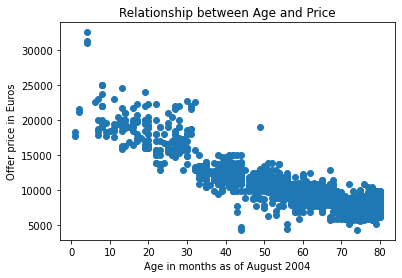

In [69]:
#Explore the relationship between Price and each of the two continuous
#predictors by constructing two scatter plots, Price against Age, and Price against
#KM. Price will be on the y-axis in both figures. Be sure to include appropriate labels.

scatterplot(car,'Age','Price', title='Relationship between Age and Price', 
            xlabel='Age in months as of August 2004', 
            ylabel='Offer price in Euros')



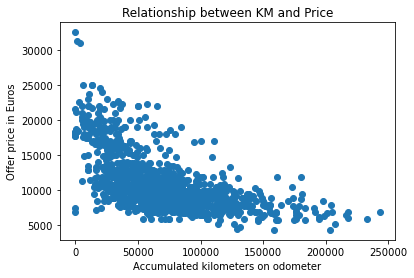

In [70]:
scatterplot(car,'KM','Price', title='Relationship between KM and Price', 
            xlabel='Accumulated kilometers on odometer', 
            ylabel='Offer price in Euros')

Reason: According to me age is the better predictor of offer price as from the graph one we can easily identify that price is inversely proportional to age. 

In [72]:
#We will use both Age and KM as the predictors to predict the price of the used
#cars. Partition the dataset into 80% training and 20% validation. Set the random
#seed to be 77. Run a multiple linear regression on the training set and write
#down the fitted predictive linear equation (the precision should be set to 4).

select_index = ['Age', 'KM']
car_X = car.loc[:, select_index]
# Target
car_y = car.iloc[:,0]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(car_X, car_y, test_size=0.2, random_state=77)

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)
np.set_printoptions(precision=4, suppress=True) # set precision for numpy arrays
print(model.coef_)
print('%.4f' % model.intercept_ )

[-154.6958   -0.0154]
20440.3509


###Let’s write down the fitted predictive equation:

Price = 20440.3509 -154.6958 × Age -0.0154 × KM

Price = 20440.3509 -154.6958 × (48) -0.0154 × (41636)

Price = 12372.2738 in Euro

In [77]:
y_pred = model.predict(X_valid)
y_new_pred = model.predict([ [48, 41636] ])
print(y_new_pred)

[12372.2738]


/Users/Geeta/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [79]:
#What is the mean absolute error on the validation set?

e = y_valid - y_pred
# compute rmse
mae = np.mean(np.abs(e))
print( mae)

## 1188.577016600191 is the mean absolute error on the validation set

1188.577016600191


In [80]:
#What is the mean absolute error on the training set?

y_pred_train = model.predict(X_train)
e = y_train - y_pred_train
# compute rmse
mae_train = np.mean( np.abs(e) )
print(mae_train)

## 1180.9359879662018 is the mean absolute error on the validation set

1180.9359879662018


In [147]:
plane = pd.read_csv("Airfares.csv")
plane.head(100)

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,1,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,0,5419.16,26993,29838,3532657,7145897,576,8820,174.47
2,1.06,3,0,9185.28,30124,29838,5787293,7145897,364,6452,207.76
3,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
4,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...
95,1.20,3,0,3247.31,29260,26752,7830332,379566,1108,7196,136.68
96,1.13,3,0,4516.90,26506,26752,4459144,379566,1088,7049,108.15
97,1.07,3,0,4840.48,32991,24348,8621121,111745,457,7574,180.85
98,1.07,3,0,4840.48,32991,24348,8621121,111745,457,7574,180.85


In [148]:
##Find a model for predicting the average fare on a new route. Partition the data
#into 70% training and 30% validation with a seed of 22. Use the training set to
#run a multiple linear regression for FARE vs. all other predictors. What are your
#fitted coefficient values for NEW and PAX, respectively?


plane_X = plane[:-2]
# Target
plane_y = plane.iloc[:,-1]

In [149]:
plane_X

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,1,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,0,5419.16,26993,29838,3532657,7145897,576,8820,174.47
2,1.06,3,0,9185.28,30124,29838,5787293,7145897,364,6452,207.76
3,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
4,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...
631,1.36,3,0,3951.55,30268,37375,1106780,991717,1125,5243,130.15
632,1.08,3,0,2216.70,32991,37375,8621121,991717,1030,34324,129.63
633,1.08,3,0,2216.70,32991,37375,8621121,991717,1030,34324,129.63
634,1.08,0,0,2216.70,32991,37375,8621121,991717,1030,34324,129.63


In [150]:
select_index = ['COUPON', 'NEW','SW','HI','S_INCOME', 'E_INCOME', 'S_POP','E_POP','DISTANCE','PAX']
plane_X = plane.loc[:, select_index]
# Target
plane_y = plane.iloc[:,-1]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
train_test_split(plane_X, plane_y, test_size=0.3, random_state=22)

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [153]:
model.fit(X_train, y_train)
# Print out the fitted coefficients
np.set_printoptions(precision=4, suppress=True) # set precision for numpy arrays
print(model.coef_)
print('%.4f' % model.intercept_ ) # set precision for floating points

[  9.3088  -0.6511 -42.9638   0.0085   0.0026   0.0023   0.       0.
   0.0663  -0.0012]
-113.5858


-0.6511, and -0.0012 are the fitted coefficient values for NEW and PAX, respectively.


In [154]:
#Predict the average fare on a route with the following characteristics:
#COUPON=1.202. NEW=3. SW= 0, HI = 4442.141, S INCOME =
#28.760. E INCOME = 27.664, S POP = 4,557,004, E POP =
#3,195,503, PAX = 12782, DISTANCE = 1976.

y_pred = model.predict(X_valid)
# make prediction for a new house with

y_new_pred = model.predict([ [1.202, 3, 0, 4442.141,28.760,27.664,4557004,3195503, 1976, 12782 ] ])
print(y_new_pred)

[103.1196]


/Users/Geeta/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [155]:
103.1196 - 60.1558

42.963800000000006

###The average fare on a given route is predicted to be 103.1196

In [156]:
#Predict the reduction in average fare on the route in (2) if Southwest decides to
#cover this route using your fitted model.

w_new_pred = model.predict([ [1.202, 3, 1, 4442.141,28.760,27.664,4557004,3195503, 1976, 12782 ] ])
print(w_new_pred)

[60.1558]


/Users/Geeta/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [157]:
y_new_pred[0] - w_new_pred[0]

42.963793537828906

The new average fare if the southwest airlines decides to cover this route will be 60.1558 units. 
Therefore, the reduction in the fare is 42.963793537828906

In [ ]:
#We would like to evaluate the predictive power of our model. Create a scatter
#plot the show the relationship between the actual target values of the validation
#data and their predicted values. Set the ×-label to "Predicted values" and y-label
#to "Actual values". Can you comment on the performance of this linear
#regression model based on this scatter plot?



Text(0, 0.5, 'Actual values of the fare')

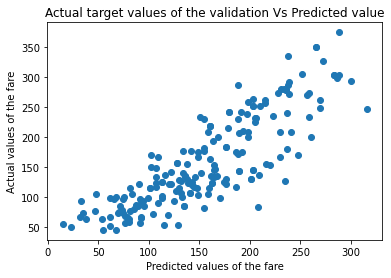

In [158]:

y_pred = model.predict(X_valid)
plt.scatter(y_pred, y_valid)
plt.title('Actual target values of the validation Vs Predicted value')
plt.xlabel('Predicted values of the fare')
plt.ylabel('Actual values of the fare')


According to the graph, we can see most of the predicted fare is far from the actual fare value. 
So, the overall accuracy of the model is not very good. 

In [159]:
#Create a histogram of the model residuals/errors of the validation set. Set the
#number of bins to 20. Set appropriate labels.

error = y_valid - y_pred

Text(0, 0.5, 'Number of route')

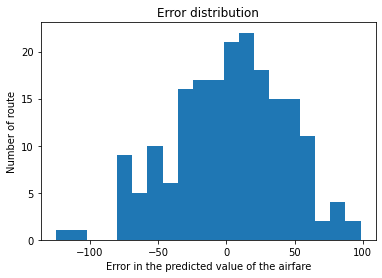

In [129]:
num_bin = 20
plt.hist(error, num_bin)
plt.title('Error distribution')
plt.xlabel('Error in the predicted value of the airfare')
plt.ylabel('Number of routes')



###There are good reasons to pay close attention to the variables that are included in a model. In reality, which factors will not be available for predicting the average fare from a new airport (i.e., before flights start operating on those routes)?

Coupon, new, HI, PAX factors will not be available for predicting 
the average fare from a new airport as these are not known before actually starting the airport.

In [160]:
#Briefly state your analytics plan to determine whether a model using only the
#factors that are available before flights begin to operate on the new route is
#good enough, or whether it is worthwhile re-building the model once flights
#begin on the new route

select_index_1 = ['S_INCOME', 'E_INCOME', 'S_POP','E_POP','DISTANCE']
wf_X_train = X_train.loc[:, select_index_1]
wf_X_valid = X_valid.loc[:, select_index_1]

In [161]:
from sklearn.linear_model import LinearRegression
wf_model = LinearRegression()

In [162]:
wf_model.fit(wf_X_train, y_train)
# Print out the fitted coefficients
np.set_printoptions(precision=4, suppress=True) # set precision for numpy arrays
print(wf_model.coef_)
print('%.4f' % wf_model.intercept_ ) 

[0.0045 0.003  0.     0.     0.0722]
-150.7716


Text(0, 0.5, 'Actual values of the fare')

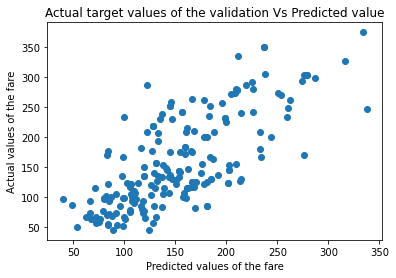

In [163]:
wf_y_pred = wf_model.predict(wf_X_valid)
plt.scatter(wf_y_pred, y_valid)
plt.title('Actual target values of the validation Vs Predicted value')
plt.xlabel('Predicted values of the fare')
plt.ylabel('Actual values of the fare')

In [164]:
wf_error = y_valid - wf_y_pred

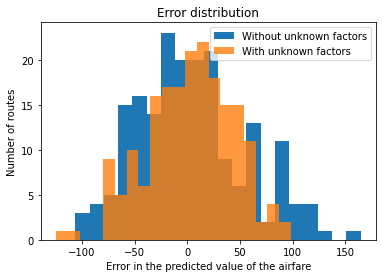

In [169]:
num_bin = 20
plt.hist(wf_error, num_bin)
plt.hist(error, num_bin, alpha = 0.8)
plt.title('Error distribution')
plt.xlabel('Error in the predicted value of the airfare')
plt.ylabel('Number of routes')
plt.legend(['Without unknown factors', 'With unknown factors'])

###Briefly state your analytics plan to determine whether a model using only the factors that are available before flights begin to operate on the new route is good enough, or whether it is worthwhile re-building the model once flights begin on the new route

I have run the regression with/without the unknown factors and created a error distribution histogram. According to the above histogram we can say that for model developed with considering unknown factor, majority of error is near zero. However, for model developed without unknown factors there are two peaks farther away from zero. With this we can say that it is better to wait for the data and then train the model.